In [1]:
import numpy as np
import pandas as pd

## 參考文獻
- http://ntur.lib.ntu.edu.tw/handle/246246/276650
- https://hdl.handle.net/11296/s3n5z6
- https://hdl.handle.net/11296/3qwcyj

In [2]:
df_dirty = pd.read_csv('1962_2022_team_Playoffs.csv')
df_dirty.head()

,year,team,league_x,r,h,b2,b3,hr_x,rbi,bb_x,...,cg,sho,sv,svo,hr_y,bb_y,strikeout,whip,hit,target
0,1962,San Francisco Giants,NL,878,1552,235,32,204,807,523,...,62,10,39,--,148,503,886,1.30,0.251,1
1,1962,New York Yankees,AL,817,1509,240,29,199,791,584,...,33,10,42,--,146,499,838,1.27,0.247,1
2,1962,Minnesota Twins,AL,798,1445,215,39,185,758,649,...,53,11,27,--,166,493,948,1.29,0.253,0
3,1962,Cincinnati Reds,NL,802,1523,252,40,167,745,498,...,51,13,35,--,149,567,964,1.34,0.254,0
4,1962,Detroit Tigers,AL,758,1352,191,36,209,719,651,...,46,8,35,--,169,503,873,1.35,0.259,0


## 資料前處理

In [3]:
# 檢查是否有相同的欄位
duplicates_mask = df_dirty.duplicated()
duplicates = df_dirty[duplicates_mask]

if duplicates.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicates)

No duplicate rows found.


In [4]:
df_clean = df_dirty.drop('league_y', axis = 1)
df_clean = df_clean.rename(columns={'league_x': 'league'})
df_clean.head()

,year,team,league,r,h,b2,b3,hr_x,rbi,bb_x,...,cg,sho,sv,svo,hr_y,bb_y,strikeout,whip,hit,target
0,1962,San Francisco Giants,NL,878,1552,235,32,204,807,523,...,62,10,39,--,148,503,886,1.30,0.251,1
1,1962,New York Yankees,AL,817,1509,240,29,199,791,584,...,33,10,42,--,146,499,838,1.27,0.247,1
2,1962,Minnesota Twins,AL,798,1445,215,39,185,758,649,...,53,11,27,--,166,493,948,1.29,0.253,0
3,1962,Cincinnati Reds,NL,802,1523,252,40,167,745,498,...,51,13,35,--,149,567,964,1.34,0.254,0
4,1962,Detroit Tigers,AL,758,1352,191,36,209,719,651,...,46,8,35,--,169,503,873,1.35,0.259,0


In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1638 non-null   int64  
 1   team       1638 non-null   object 
 2   league     1638 non-null   object 
 3   r          1638 non-null   int64  
 4   h          1638 non-null   int64  
 5   b2         1638 non-null   int64  
 6   b3         1638 non-null   int64  
 7   hr_x       1638 non-null   int64  
 8   rbi        1638 non-null   int64  
 9   bb_x       1638 non-null   int64  
 10  so         1638 non-null   int64  
 11  sb         1638 non-null   int64  
 12  cs         1638 non-null   int64  
 13  avg        1638 non-null   float64
 14  obp        1638 non-null   float64
 15  slg        1638 non-null   float64
 16  ops        1638 non-null   float64
 17  win        1638 non-null   int64  
 18  loss       1638 non-null   int64  
 19  era        1638 non-null   float64
 20  cg      

In [6]:
df_clean.shape

(1638, 30)

## 單變量分析

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\315\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
df_clean.describe()

,year,r,h,b2,b3,hr_x,rbi,bb_x,so,sb,...,era,cg,sho,sv,hr_y,bb_y,strikeout,whip,hit,target
count,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,...,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000
mean,1994.000000,697.434066,1387.736874,253.136142,32.177656,148.160562,658.185592,513.894994,1000.804640,97.324786,...,4.031893,17.783883,9.841880,36.971917,148.160562,513.894383,1000.804640,1.347063,0.257593,0.227106
std,17.227927,112.986866,171.239111,47.696458,10.942212,43.694606,110.018096,85.467738,217.748808,40.579095,...,0.595912,17.016315,4.428627,9.611409,38.282466,83.626342,219.683358,0.097709,0.014446,0.419090
min,1962.000000,219.000000,390.000000,73.000000,3.000000,32.000000,204.000000,147.000000,379.000000,14.000000,...,2.450000,0.000000,0.000000,6.000000,40.000000,145.000000,388.000000,1.050000,0.206000,0.000000
25%,1979.250000,640.000000,1346.000000,224.000000,25.000000,117.000000,601.000000,469.000000,861.000000,68.000000,...,3.612500,4.000000,7.000000,31.000000,121.000000,470.000000,859.000000,1.280000,0.248000,0.000000
50%,1995.000000,703.000000,1410.000000,259.000000,31.000000,147.000000,662.000000,516.000000,977.000000,92.000000,...,4.000000,11.000000,9.000000,38.000000,148.000000,517.000000,982.000000,1.350000,0.258000,0.000000
75%,2009.000000,768.000000,1476.000000,286.000000,39.000000,177.000000,726.000000,567.000000,1129.000000,122.000000,...,4.427500,29.000000,12.000000,44.000000,174.000000,566.000000,1141.000000,1.410000,0.267000,0.000000
max,2022.000000,1009.000000,1684.000000,376.000000,79.000000,307.000000,960.000000,775.000000,1596.000000,341.000000,...,6.380000,94.000000,30.000000,68.000000,305.000000,784.000000,1687.000000,1.730000,0.301000,1.000000


In [9]:
# 找出進季後賽隊伍平均勝場是多少
playoff_teams = df_clean[df_clean['target'] == 1]

# 計算進入季後賽隊伍的平均勝場
average_wins_playoff_teams = playoff_teams['win'].mean()
print(f'進入季後賽隊伍平均勝場: {average_wins_playoff_teams}')

進入季後賽隊伍平均勝場: 91.33064516129032


In [10]:
# 篩選進入季後賽的隊伍
playoff_teams = df_clean[df_clean['target'] == 1]

# 找出進入季後賽隊伍中勝場最少的隊伍
min_wins_playoff_teams = playoff_teams['win'].idxmin()
min_wins_team_info = df_clean.loc[min_wins_playoff_teams]

print(f'進入季後賽隊伍最低勝場隊伍的資訊:\n{min_wins_team_info}')

####### 2020年洛杉磯道奇隊奪冠

進入季後賽隊伍最低勝場隊伍的資訊:
year                   2020
team         Houston Astros
league                   AL
r                       279
h                       478
b2                      103
b3                       12
hr_x                     69
rbi                     268
bb_x                    192
so                      440
sb                       22
cs                       11
avg                    0.24
obp                   0.312
slg                   0.408
ops                    0.72
win                      29
loss                     31
era                    4.31
cg                        0
sho                       0
sv                       16
svo                      29
hr_y                     70
bb_y                    217
strikeout               526
whip                   1.31
hit                   0.239
target                    1
Name: 1563, dtype: object


In [11]:
# 篩選進入季後賽的隊伍
playoff_teams = df_clean[df_clean['target'] == 1]

# 找出進入季後賽隊伍中勝場最少的隊伍
max_wins_playoff_teams = playoff_teams['win'].idxmax()
max_wins_team_info = df_clean.loc[max_wins_playoff_teams]

print(f'進入季後賽隊伍最高勝場隊伍的資訊:\n{max_wins_team_info}')



###### 該年冠軍為'亞利桑那響尾蛇'

進入季後賽隊伍最高勝場隊伍的資訊:
year                     2001
team         Seattle Mariners
league                     AL
r                         927
h                        1637
b2                        310
b3                         38
hr_x                      169
rbi                       881
bb_x                      614
so                        989
sb                        174
cs                         42
avg                     0.288
obp                      0.36
slg                     0.445
ops                     0.805
win                       116
loss                       46
era                      3.54
cg                          8
sho                        14
sv                         56
svo                        73
hr_y                      160
bb_y                      465
strikeout                1051
whip                      1.2
hit                     0.236
target                      1
Name: 981, dtype: object


In [12]:
# 找出進季後賽的隊伍strikeout平均
playoff_teams = df_clean[df_clean['target'] == 1]

# 計算進入季後賽隊伍的strikeout平均
average_strikeout_playoff_teams = playoff_teams['strikeout'].mean()
print(f'進入季後賽隊伍strikeout平均: {average_strikeout_playoff_teams}')

進入季後賽隊伍strikeout平均: 1082.3306451612902


In [13]:
# 找出沒進季後賽的隊伍strikeout平均
nonplayoff_teams = df_clean[df_clean['target'] == 0]

# 計算沒進入季後賽隊伍的strikeout平均
average_strikeout_nonplayoff_teams = nonplayoff_teams['strikeout'].mean()
print(f'沒進入季後賽隊伍strikeout平均: {average_strikeout_nonplayoff_teams}')

沒進入季後賽隊伍strikeout平均: 976.8491311216429


In [14]:
# 計算進入季後賽隊伍的whip平均
average_whip_playoff_teams = playoff_teams['whip'].mean()
print(f'進入季後賽隊伍whip平均: {average_whip_playoff_teams}')

進入季後賽隊伍whip平均: 1.280510752688173


In [15]:
# 計算沒進入季後賽隊伍的whip平均
average_whip_nonplayoff_teams = nonplayoff_teams['whip'].mean()
print(f'進入季後賽隊伍whip平均: {average_whip_nonplayoff_teams}')

進入季後賽隊伍whip平均: 1.3666192733017373


In [16]:
# 計算進入季後賽隊伍的hit平均
average_hit_playoff_teams = playoff_teams['hit'].mean()
print(f'進入季後賽隊伍hit平均: {average_hit_playoff_teams}')

進入季後賽隊伍hit平均: 0.24864247311827958


In [17]:
# 計算沒進入季後賽隊伍的hit平均
average_hit_nonplayoff_teams = nonplayoff_teams['hit'].mean()
print(f'進入季後賽隊伍hit平均: {average_hit_nonplayoff_teams}')

進入季後賽隊伍hit平均: 0.2602235387045804


Text(0, 0.5, 'Frequency')

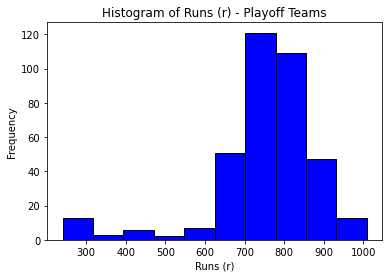

In [18]:
# 篩選有進入季後賽的數據
playoff_teams = df_clean[df_clean['target'] == 1]

# 繪製有進入季後賽的直方圖
plt.hist(playoff_teams['r'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Runs (r) - Playoff Teams')
plt.xlabel('Runs (r)')
plt.ylabel('Frequency')

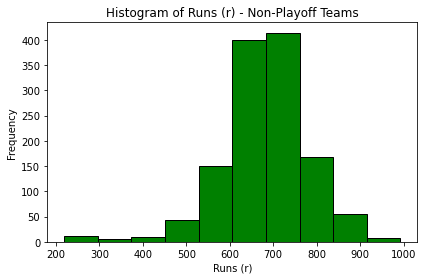

In [19]:
# 篩選沒有進入季後賽的數據
non_playoff_teams = df_clean[df_clean['target'] == 0]

# 繪製沒有進入季後賽的直方圖
plt.hist(non_playoff_teams['r'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Runs (r) - Non-Playoff Teams')
plt.xlabel('Runs (r)')
plt.ylabel('Frequency')

plt.tight_layout()  # 保證子圖之間的間距合適
plt.show()

Text(0, 0.5, 'Amount')

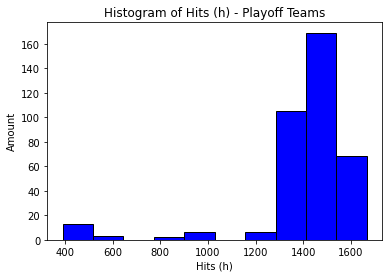

In [20]:
# 篩選有進入季後賽的數據
playoff_teams = df_clean[df_clean['target'] == 1]

# 繪製有進入季後賽的直方圖
plt.hist(playoff_teams['h'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Hits (h) - Playoff Teams')
plt.xlabel('Hits (h)')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

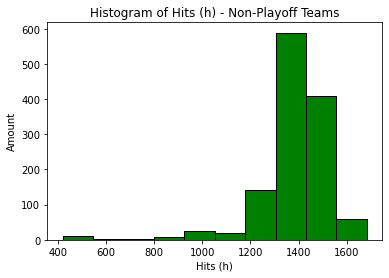

In [21]:
# 篩選沒有進入季後賽的數據
non_playoff_teams = df_clean[df_clean['target'] == 0]

# 繪製沒有進入季後賽的直方圖
plt.hist(non_playoff_teams['h'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Hits (h) - Non-Playoff Teams')
plt.xlabel('Hits (h)')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

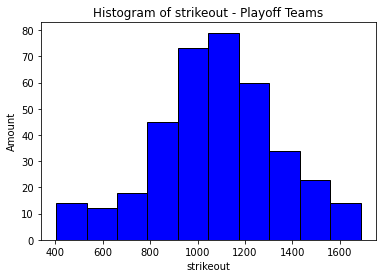

In [22]:
# 篩選有進入季後賽的數據
playoff_teams = df_clean[df_clean['target'] == 1]

# 繪製有進入季後賽的直方圖
plt.hist(playoff_teams['strikeout'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of strikeout - Playoff Teams')
plt.xlabel('strikeout')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

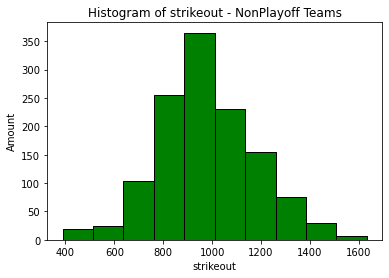

In [23]:
# 篩選有進入季後賽的數據
playoff_teams = df_clean[df_clean['target'] == 0]

# 繪製沒有進入季後賽的直方圖
plt.hist(playoff_teams['strikeout'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of strikeout - NonPlayoff Teams')
plt.xlabel('strikeout')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

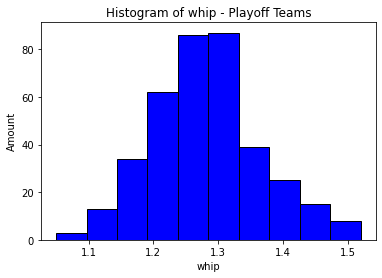

In [24]:
# 篩選有進入季後賽的數據
playoff_teams = df_clean[df_clean['target'] == 1]

# 繪製有進入季後賽的直方圖
plt.hist(playoff_teams['whip'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of whip - Playoff Teams')
plt.xlabel('whip')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

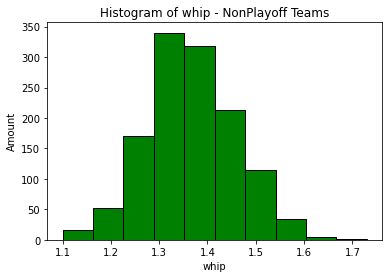

In [25]:
# 篩選沒有進入季後賽的數據
playoff_teams = df_clean[df_clean['target'] == 0]

# 繪製沒有進入季後賽的直方圖
plt.hist(playoff_teams['whip'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of whip - NonPlayoff Teams')
plt.xlabel('whip')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

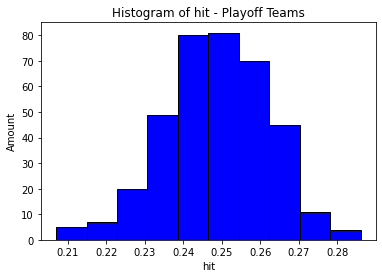

In [26]:
# 篩選有進入季後賽的數據
playoff_teams = df_clean[df_clean['target'] == 1]

# 繪製有進入季後賽的直方圖
plt.hist(playoff_teams['hit'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of hit - Playoff Teams')
plt.xlabel('hit')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

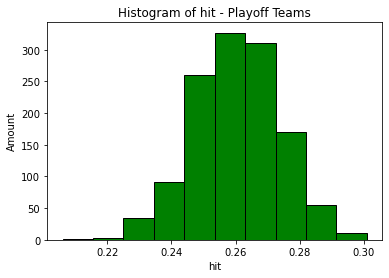

In [27]:
# 篩選沒有進入季後賽的數據
playoff_teams = df_clean[df_clean['target'] == 0]

# 繪製沒有進入季後賽的直方圖
plt.hist(playoff_teams['hit'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of hit - Playoff Teams')
plt.xlabel('hit')
plt.ylabel('Amount')

## 雙變量分析

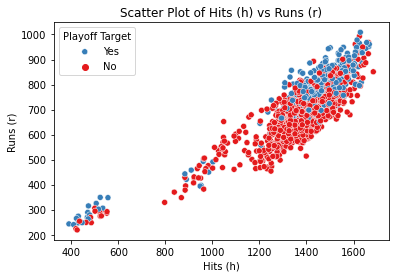

In [28]:
#'r'（得分）和 'h'（安打）
# 散點圖
sns.scatterplot(x='h', y='r', data=df_clean, hue='target', palette='Set1')
plt.title('Scatter Plot of Hits (h) vs Runs (r)')
plt.xlabel('Hits (h)')
plt.ylabel('Runs (r)')
plt.legend(title='Playoff Target', labels=['Yes', 'No'])
plt.show()

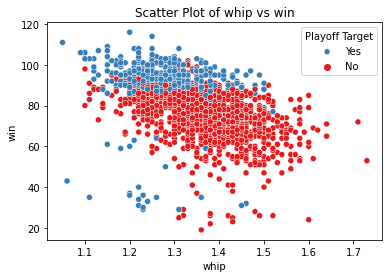

In [29]:
#'whip'和 'win'
# 散點圖
sns.scatterplot(x='whip', y='win', data=df_clean, hue='target', palette='Set1')
plt.title('Scatter Plot of whip vs win')
plt.xlabel('whip')
plt.ylabel('win')
plt.legend(title='Playoff Target', labels=['Yes', 'No'])
plt.show()

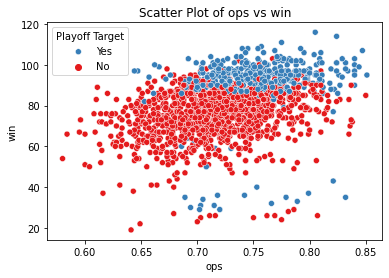

In [30]:
#'ops'和 'win'
# 散點圖
sns.scatterplot(x='ops', y='win', data=df_clean, hue='target', palette='Set1')
plt.title('Scatter Plot of ops vs win')
plt.xlabel('ops')
plt.ylabel('win')
plt.legend(title='Playoff Target', labels=['Yes', 'No'])
plt.show()

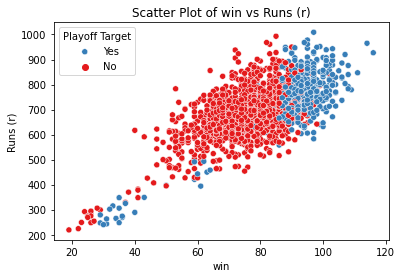

In [31]:
#'r'（得分）和 'win'
# 散點圖
sns.scatterplot(x='win', y='r', data=df_clean, hue='target', palette='Set1')
plt.title('Scatter Plot of win vs Runs (r)')
plt.xlabel('win')
plt.ylabel('Runs (r)')
plt.legend(title='Playoff Target', labels=['Yes', 'No'])
plt.show()

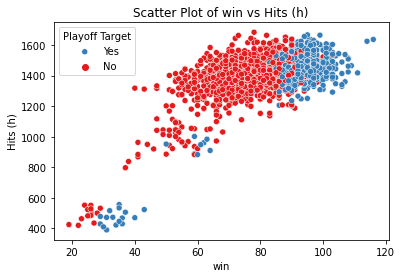

In [32]:
#'h'（安打）和 'win'
sns.scatterplot(x='win', y='h', data=df_clean, hue='target', palette='Set1')
plt.title('Scatter Plot of win vs Hits (h)')
plt.xlabel('win')
plt.ylabel('Hits (h)')
plt.legend(title='Playoff Target', labels=['Yes', 'No'])
plt.show()

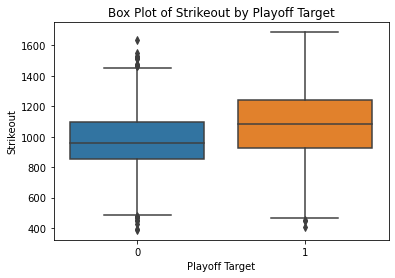

In [33]:
# strikeout和target
sns.boxplot(x='target', y='strikeout', data=df_clean)
plt.title('Box Plot of Strikeout by Playoff Target')
plt.xlabel('Playoff Target')
plt.ylabel('Strikeout')
plt.show()

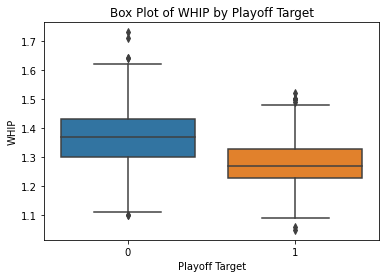

In [34]:
# whip和target
sns.boxplot(x='target', y='whip', data=df_clean)
plt.title('Box Plot of WHIP by Playoff Target')
plt.xlabel('Playoff Target')
plt.ylabel('WHIP')
plt.show()

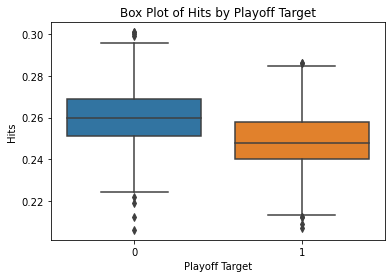

In [35]:
# hit和target
sns.boxplot(x='target', y='hit', data=df_clean)
plt.title('Box Plot of Hits by Playoff Target')
plt.xlabel('Playoff Target')
plt.ylabel('Hits')
plt.show()

## 用correlation_matrix找出各欄位與target的相關性

In [36]:
# 計算整個相關性矩陣
correlation_matrix = df_clean.corr()

# 打印相關性矩陣
print(correlation_matrix)

               year         r         h        b2        b3      hr_x  \
year       1.000000  0.170077 -0.057401  0.456028 -0.412452  0.442820   
r          0.170077  1.000000  0.844675  0.780082  0.172803  0.734801   
h         -0.057401  0.844675  1.000000  0.734317  0.368331  0.433028   
b2         0.456028  0.780082  0.734317  1.000000  0.081133  0.574004   
b3        -0.412452  0.172803  0.368331  0.081133  1.000000 -0.224079   
hr_x       0.442820  0.734801  0.433028  0.574004 -0.224079  1.000000   
rbi        0.219292  0.996350  0.827686  0.795043  0.140396  0.763394   
bb_x      -0.077189  0.703142  0.592381  0.450969  0.100596  0.435266   
so         0.609247  0.361286  0.275217  0.492568 -0.144485  0.587737   
sb        -0.058176  0.193891  0.263173  0.152769  0.300597 -0.132387   
cs        -0.428528  0.033513  0.233859 -0.066224  0.377755 -0.324105   
avg        0.061286  0.642135  0.567134  0.521764  0.201872  0.291844   
obp        0.134027  0.675561  0.416035  0.469390  

In [37]:
# 打印與 'target' 相關性絕對值大於 0.3 的變量
for col in correlation_matrix.columns:
    if abs(correlation_matrix['target'][col]) > 0.3 and col != 'target':
        print(f'{col}: {correlation_matrix["target"][col]}')

obp: 0.32303541189107765
slg: 0.3326626264041883
ops: 0.34987618931186026
win: 0.4770534387793083
loss: -0.5544498963671319
sv: 0.3291595128811194
whip: -0.3693327381859984
hit: -0.3359734353964355


## 建立模型進行預測

### Random Forest

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
# Select features and target variable
X = df_clean.drop(['year', 'team', 'league', 'target', 'svo'], axis=1)
y = df_clean['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
result = rf_classifier.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_test: {accuracy:.2f}\n')

accuracy_train = accuracy_score(y_train, result)
print(f'Accuracy_train: {accuracy_train:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('\n\nClassification Report:')
print(class_report)

Accuracy_test: 0.89

Accuracy_train: 1.00


Confusion Matrix:
[[234  17]
 [ 19  58]]


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       251
           1       0.77      0.75      0.76        77

    accuracy                           0.89       328
   macro avg       0.85      0.84      0.85       328
weighted avg       0.89      0.89      0.89       328



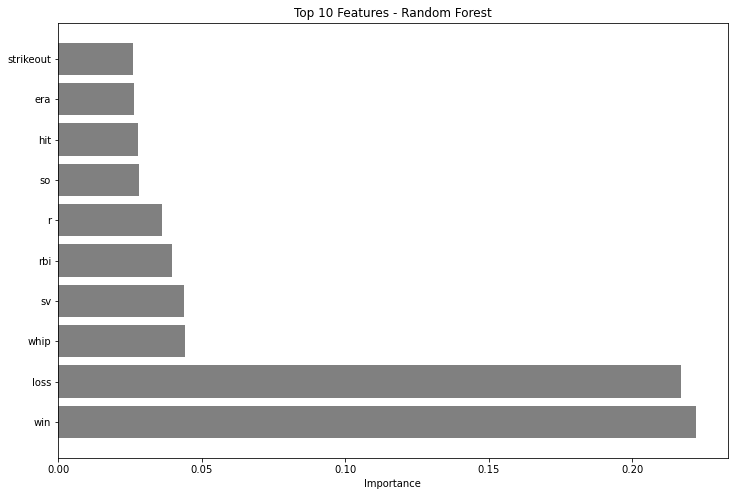

In [40]:
# Visualize feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N features and their importances
top_n = 10  # Adjust this value based on your preferences
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n], color='gray')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Features - Random Forest')
plt.show()

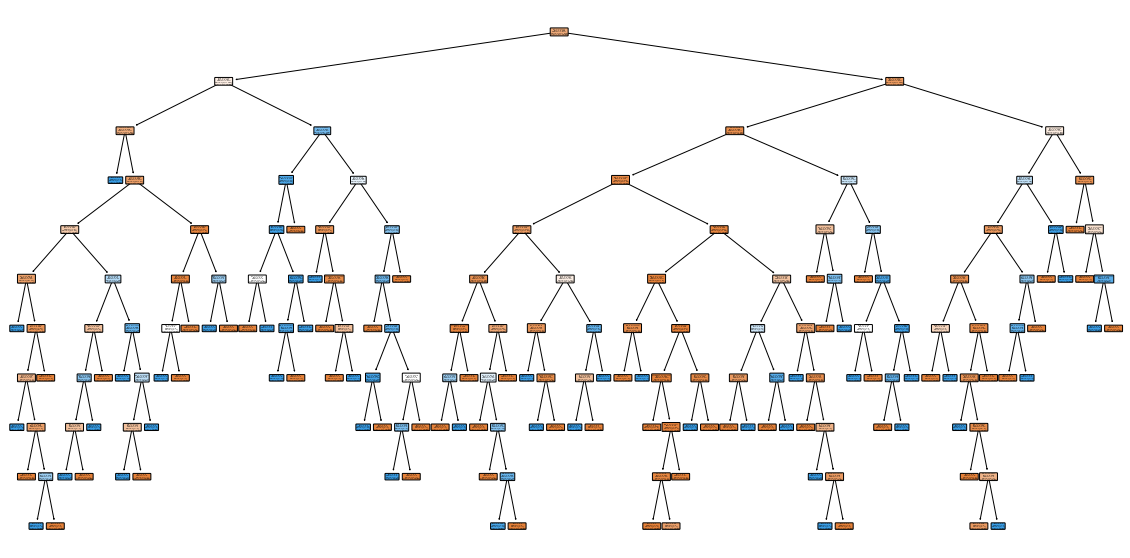

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming rf_classifier is your trained RandomForestClassifier
# Choose one tree from the forest (e.g., the first tree)
tree_to_visualize = rf_classifier.estimators_[0]

# Plot the selected tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_visualize, feature_names=X.columns, class_names=['Not Target', 'Target'], filled=True, rounded=True)
plt.show()

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [64]:
# Select features and target variable
X = df_clean.drop(['year', 'team', 'league', 'target', 'svo'], axis=1)
y = df_clean['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)
result = logistic_regression.predict(X_train)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Accuracy test: {accuracy_test:.2f}')

accuracy_train = accuracy_score(y_train, result)
print(f'Accuracy_train: {accuracy_train:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print('\n\nConfusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('\n\nClassification Report:')
print(class_report)

Accuracy test: 0.89
Accuracy_train: 0.91



Confusion Matrix:
[[236  15]
 [ 22  55]]


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       251
           1       0.79      0.71      0.75        77

    accuracy                           0.89       328
   macro avg       0.85      0.83      0.84       328
weighted avg       0.88      0.89      0.89       328



C:\Users\315\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
# Get the coefficients from the trained Logistic Regression model
coefficients = logistic_regression.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient magnitude in descending order
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the top N features
top_n = 10  # Set the number of top features to display
print(f'Top {top_n} features:')
print(coefficients_df.head(top_n))

Top 10 features:
   Feature  Coefficient  Abs_Coefficient
15    loss    -0.133082         0.133082
14     win     0.117555         0.117555
19      sv     0.073366         0.073366
17      cg    -0.031194         0.031194
20    hr_y    -0.025202         0.025202
18     sho     0.020167         0.020167
5      rbi     0.015967         0.015967
1        h    -0.008475         0.008475
21    bb_y    -0.006982         0.006982
4     hr_x    -0.006611         0.006611


### SVM

In [45]:
from sklearn.svm import SVC

In [46]:
# Select features and target variable
X = df_clean.drop(['year', 'team', 'league', 'target', 'svo'], axis=1)
y = df_clean['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)
result = svm_classifier.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_test: {accuracy:.2f}\n')

accuracy_train = accuracy_score(y_train, result)
print(f'Accuracy_train: {accuracy_train:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print('\n\nConfusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('\n\nClassification Report:')
print(class_report)

Accuracy_test: 0.80

Accuracy_train: 0.81



Confusion Matrix:
[[249   2]
 [ 65  12]]


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       251
           1       0.86      0.16      0.26        77

    accuracy                           0.80       328
   macro avg       0.83      0.57      0.57       328
weighted avg       0.81      0.80      0.74       328



### XGBoost

In [47]:
from xgboost import XGBClassifier

In [48]:
# Select features and target variable
X = df_clean.drop(['year', 'team', 'league', 'target', 'svo'], axis=1)
y = df_clean['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)
result = xgb_classifier.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_test: {accuracy:.2f}\n')

accuracy_train = accuracy_score(y_train, result)
print(f'Accuracy_train: {accuracy_train:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print('\n\nConfusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('\n\nClassification Report:')
print(class_report)

Accuracy_test: 0.88

Accuracy_train: 1.00



Confusion Matrix:
[[231  20]
 [ 19  58]]


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       251
           1       0.74      0.75      0.75        77

    accuracy                           0.88       328
   macro avg       0.83      0.84      0.84       328
weighted avg       0.88      0.88      0.88       328



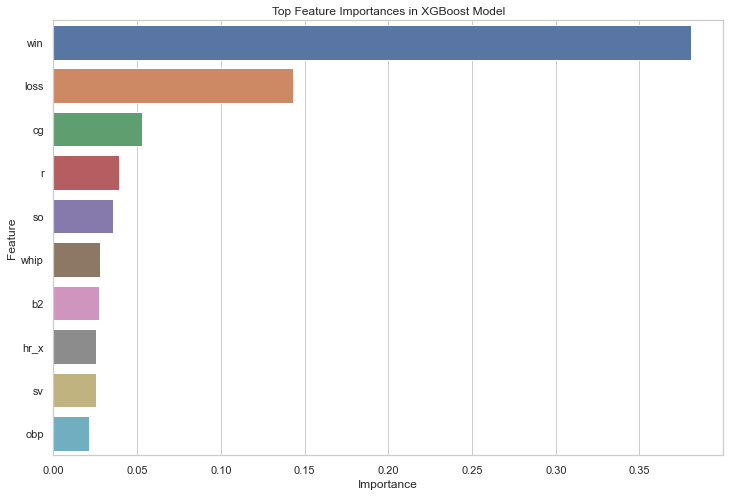

In [49]:
# Visualize feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_classifier.feature_importances_
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Set the style for better visualization
sns.set(style="whitegrid")

# Create a bar plot of feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
plt.title('Top Feature Importances in XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 將各模型重要的特徵抽取出來，再進行一次預測

### Random Forest

In [50]:
# Select the top N important features from Random Forest
top_n_rf_features = feature_importance_df['Feature'][:top_n].tolist()
X_top_n_rf = X[top_n_rf_features]

# Split the data into training and testing sets
X_top_n_rf_train, X_top_n_rf_test, y_train, y_test = train_test_split(X_top_n_rf, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier on the top N features
rf_classifier_top_n = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf_classifier_top_n.fit(X_top_n_rf_train, y_train)

# Make predictions on the test set
y_pred_top_n_rf = rf_classifier_top_n.predict(X_top_n_rf_test)
result = rf_classifier_top_n.predict(X_top_n_rf_train)

# Evaluate the model
accuracy_top_n_rf = accuracy_score(y_test, y_pred_top_n_rf)
print(f'Accuracy with Top {top_n} Features test - Random Forest: {accuracy_top_n_rf:.2f}')

accuracy_top_n_rf_train = accuracy_score(y_train, result)
print(f'Accuracy with Top {top_n} Features train - Random Forest: {accuracy_top_n_rf_train:.2f}')

conf_matrix_top_n_rf = confusion_matrix(y_test, y_pred_top_n_rf)
print('\nConfusion Matrix:')
print(conf_matrix_top_n_rf)

class_report_top_n_rf = classification_report(y_test, y_pred_top_n_rf)
print('\nClassification Report:')
print(class_report_top_n_rf)

Accuracy with Top 10 Features test - Random Forest: 0.88
Accuracy with Top 10 Features train - Random Forest: 1.00

Confusion Matrix:
[[232  19]
 [ 20  57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       251
           1       0.75      0.74      0.75        77

    accuracy                           0.88       328
   macro avg       0.84      0.83      0.83       328
weighted avg       0.88      0.88      0.88       328



### Logistic Regression

In [51]:
# Select the top N important features from Random Forest
top_n_rf_features = feature_importance_df['Feature'][:10].tolist()
X_top_n_rf = X[top_n_rf_features]

# Split the data into training and testing sets
X_top_n_rf_train, X_top_n_rf_test, y_train, y_test = train_test_split(X_top_n_rf, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model on the top N features
logistic_regression_top_n = LogisticRegression(random_state=42)
logistic_regression_top_n.fit(X_top_n_rf_train, y_train)

# Make predictions on the test set
y_pred_top_n_rf = logistic_regression_top_n.predict(X_top_n_rf_test)
result = logistic_regression_top_n.predict(X_top_n_rf_train)

# Evaluate the model
accuracy_top_n_rf = accuracy_score(y_test, y_pred_top_n_rf)
print(f'Accuracy with Top 10 Features test - Logistic Regression: {accuracy_top_n_rf:.2f}')

accuracy_top_n_rf_train = accuracy_score(y_train, result)
print(f'Accuracy with Top 10 Features train - Logistic Regression: {accuracy_top_n_rf_train:.2f}')

conf_matrix_top_n_rf = confusion_matrix(y_test, y_pred_top_n_rf)
print('\nConfusion Matrix:')
print(conf_matrix_top_n_rf)

class_report_top_n_rf = classification_report(y_test, y_pred_top_n_rf)
print('\nClassification Report:')
print(class_report_top_n_rf)

Accuracy with Top 10 Features test - Logistic Regression: 0.88
Accuracy with Top 10 Features train - Logistic Regression: 0.91

Confusion Matrix:
[[235  16]
 [ 22  55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       251
           1       0.77      0.71      0.74        77

    accuracy                           0.88       328
   macro avg       0.84      0.83      0.83       328
weighted avg       0.88      0.88      0.88       328



C:\Users\315\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM

In [52]:
# Select the top N important features from Random Forest
top_n_rf_features = feature_importance_df['Feature'][:10].tolist()
X_top_n_rf = X[top_n_rf_features]

# Split the data into training and testing sets
X_top_n_rf_train, X_top_n_rf_test, y_train, y_test = train_test_split(X_top_n_rf, y, test_size=0.2, random_state=42)

# Create and train the SVM model on the top N features
svm_classifier_top_n = SVC(random_state=42)
svm_classifier_top_n.fit(X_top_n_rf_train, y_train)

# Make predictions on the test set
y_pred_top_n_rf = svm_classifier_top_n.predict(X_top_n_rf_test)
result = svm_classifier_top_n.predict(X_top_n_rf_train)

# Evaluate the model
accuracy_top_n_rf = accuracy_score(y_test, y_pred_top_n_rf)
print(f'Accuracy with Top 10 Features test - SVM: {accuracy_top_n_rf:.2f}')

accuracy_top_n_rf_train = accuracy_score(y_train, result)
print(f'Accuracy with Top 10 Features train - SVM: {accuracy_top_n_rf_train:.2f}')

conf_matrix_top_n_rf = confusion_matrix(y_test, y_pred_top_n_rf)
print('\nConfusion Matrix:')
print(conf_matrix_top_n_rf)

class_report_top_n_rf = classification_report(y_test, y_pred_top_n_rf)
print('\nClassification Report:')
print(class_report_top_n_rf)

Accuracy with Top 10 Features test - SVM: 0.77
Accuracy with Top 10 Features train - SVM: 0.77

Confusion Matrix:
[[251   0]
 [ 77   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       251
           1       0.00      0.00      0.00        77

    accuracy                           0.77       328
   macro avg       0.38      0.50      0.43       328
weighted avg       0.59      0.77      0.66       328



C:\Users\315\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\315\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\315\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost

In [53]:
# Select the top N important features from Random Forest
top_n_rf_features = feature_importance_df['Feature'][:10].tolist()
X_top_n_rf = X[top_n_rf_features]

# Split the data into training and testing sets
X_top_n_rf_train, X_top_n_rf_test, y_train, y_test = train_test_split(X_top_n_rf, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model on the top N features
xgb_classifier_top_n = XGBClassifier(random_state=42)
xgb_classifier_top_n.fit(X_top_n_rf_train, y_train)

# Make predictions on the test set
y_pred_top_n_rf = xgb_classifier_top_n.predict(X_top_n_rf_test)
result = xgb_classifier_top_n.predict(X_top_n_rf_train)

# Evaluate the model
accuracy_top_n_rf = accuracy_score(y_test, y_pred_top_n_rf)
print(f'Accuracy with Top 10 Features test - XGBoost: {accuracy_top_n_rf:.2f}')

accuracy_top_n_rf_train = accuracy_score(y_train, result)
print(f'Accuracy with Top 10 Features train - XGBoost: {accuracy_top_n_rf_train:.2f}')

conf_matrix_top_n_rf = confusion_matrix(y_test, y_pred_top_n_rf)
print('\nConfusion Matrix:')
print(conf_matrix_top_n_rf)

class_report_top_n_rf = classification_report(y_test, y_pred_top_n_rf)
print('\nClassification Report:')
print(class_report_top_n_rf)

Accuracy with Top 10 Features test - XGBoost: 0.88
Accuracy with Top 10 Features train - XGBoost: 1.00

Confusion Matrix:
[[231  20]
 [ 20  57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       251
           1       0.74      0.74      0.74        77

    accuracy                           0.88       328
   macro avg       0.83      0.83      0.83       328
weighted avg       0.88      0.88      0.88       328



## 結論

**如果一支球隊想要晉級季後賽，那麼**
- ***要先提高勝場(廢話)***
- ***簽下戰力強的投手(被上壘率低的投手)，而不是尋求強打***

### 尋找Random Forest最佳參數

In [54]:
from sklearn.model_selection import GridSearchCV

# Select features and target variable
X = df_clean.drop(['year', 'team', 'league', 'target', 'svo'], axis=1)
y = df_clean['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('\n\nClassification Report:')
print(class_report)


Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.89


Confusion Matrix:
[[234  17]
 [ 19  58]]


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       251
           1       0.77      0.75      0.76        77

    accuracy                           0.89       328
   macro avg       0.85      0.84      0.85       328
weighted avg       0.89      0.89      0.89       328



## 將`win`, `loss`去除，用剩下的features進行預測

### Random Forest

In [55]:
# Select features and target variable
X = df_clean.drop(['year', 'team', 'league', 'target', 'svo', 'win', 'loss'], axis=1)
y = df_clean['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
result = rf_classifier.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_test: {accuracy:.2f}\n')

accuracy_train = accuracy_score(y_train, result)
print(f'Accuracy_train: {accuracy_train:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('\n\nClassification Report:')
print(class_report)

Accuracy_test: 0.84

Accuracy_train: 1.00


Confusion Matrix:
[[236  15]
 [ 36  41]]


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       251
           1       0.73      0.53      0.62        77

    accuracy                           0.84       328
   macro avg       0.80      0.74      0.76       328
weighted avg       0.84      0.84      0.84       328



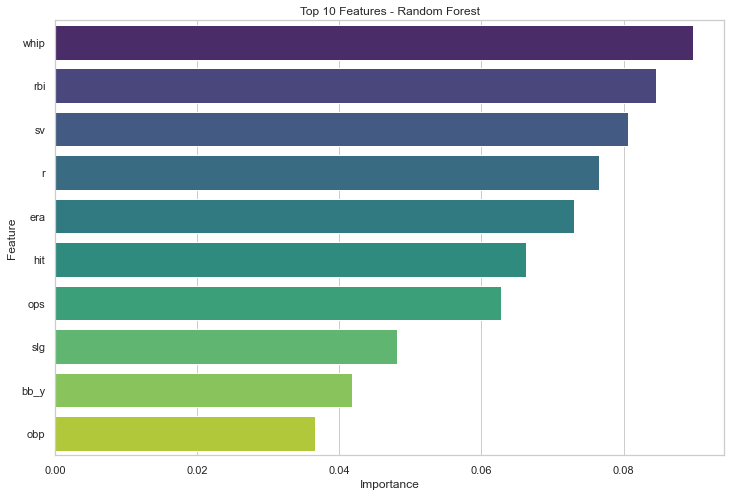

In [56]:
# Get feature importances from the trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the top N features and their importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette="viridis")
plt.title('Top 10 Features - Random Forest')
plt.show()

### Logistic Regression

In [57]:
# Select features and target variable
X = df_clean.drop(['year', 'team', 'league', 'target', 'svo', 'win', 'loss'], axis=1)
y = df_clean['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)
result = logistic_regression.predict(X_train)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Accuracy test: {accuracy_test:.2f}')

accuracy_train = accuracy_score(y_train, result)
print(f'Accuracy_train: {accuracy_train:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print('\n\nConfusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('\n\nClassification Report:')
print(class_report)

Accuracy test: 0.86
Accuracy_train: 0.88



Confusion Matrix:
[[236  15]
 [ 32  45]]


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       251
           1       0.75      0.58      0.66        77

    accuracy                           0.86       328
   macro avg       0.82      0.76      0.78       328
weighted avg       0.85      0.86      0.85       328



C:\Users\315\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
# Get the coefficients and corresponding features
coefficients = logistic_regression.coef_[0]
feature_names = X.columns

# Create a DataFrame to display feature names and their coefficients
coefficient_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values in descending order
coefficient_df['Absolute Coefficient'] = coefficient_df['Coefficient'].abs()
coefficient_df = coefficient_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top N features and their coefficients
top_n = 10
print(f'Top {top_n} features and their coefficients:')
print(coefficient_df.head(top_n))

Top 10 features and their coefficients:
   Feature  Coefficient  Absolute Coefficient
17      sv     0.090458              0.090458
18    hr_y    -0.053065              0.053065
16     sho     0.030457              0.030457
5      rbi     0.020338              0.020338
0        r     0.019297              0.019297
15      cg    -0.015190              0.015190
19    bb_y    -0.014545              0.014545
1        h    -0.012516              0.012516
2       b2    -0.010832              0.010832
9       cs    -0.007088              0.007088


### SVM

In [59]:
# Select features and target variable
X = df_clean.drop(['year', 'team', 'league', 'target', 'svo', 'win', 'loss'], axis=1)
y = df_clean['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)
result = svm_classifier.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_test: {accuracy:.2f}\n')

accuracy_train = accuracy_score(y_train, result)
print(f'Accuracy_train: {accuracy_train:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print('\n\nConfusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('\n\nClassification Report:')
print(class_report)

Accuracy_test: 0.80

Accuracy_train: 0.82



Confusion Matrix:
[[249   2]
 [ 65  12]]


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       251
           1       0.86      0.16      0.26        77

    accuracy                           0.80       328
   macro avg       0.83      0.57      0.57       328
weighted avg       0.81      0.80      0.74       328



### XGBoost

In [60]:
# Select features and target variable
X = df_clean.drop(['year', 'team', 'league', 'target', 'svo', 'win', 'loss'], axis=1)
y = df_clean['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)
result = xgb_classifier.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_test: {accuracy:.2f}\n')

accuracy_train = accuracy_score(y_train, result)
print(f'Accuracy_train: {accuracy_train:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print('\n\nConfusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('\n\nClassification Report:')
print(class_report)

Accuracy_test: 0.86

Accuracy_train: 1.00



Confusion Matrix:
[[231  20]
 [ 27  50]]


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       251
           1       0.71      0.65      0.68        77

    accuracy                           0.86       328
   macro avg       0.80      0.78      0.79       328
weighted avg       0.85      0.86      0.85       328



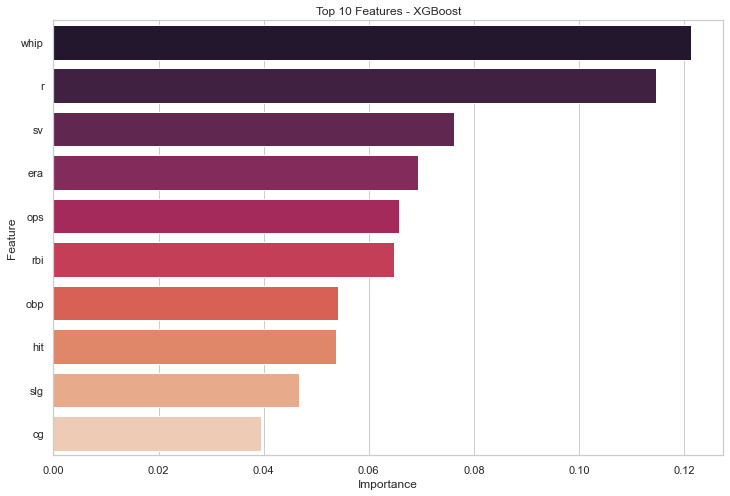

In [61]:
# Get feature importances from the trained XGBoost classifier
feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to display feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the top N features and their importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette="rocket")
plt.title('Top 10 Features - XGBoost')
plt.show()

In [62]:
# Select features and target variable
X = df_clean.drop(['year', 'team', 'league', 'target', 'svo'], axis=1)
y = df_clean['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
result = rf_classifier.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_test: {accuracy:.2f}\n')

accuracy_train = accuracy_score(y_train, result)
print(f'Accuracy_train: {accuracy_train:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('\n\nClassification Report:')
print(class_report)

Accuracy_test: 0.89

Accuracy_train: 0.92


Confusion Matrix:
[[238  13]
 [ 23  54]]


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       251
           1       0.81      0.70      0.75        77

    accuracy                           0.89       328
   macro avg       0.86      0.82      0.84       328
weighted avg       0.89      0.89      0.89       328



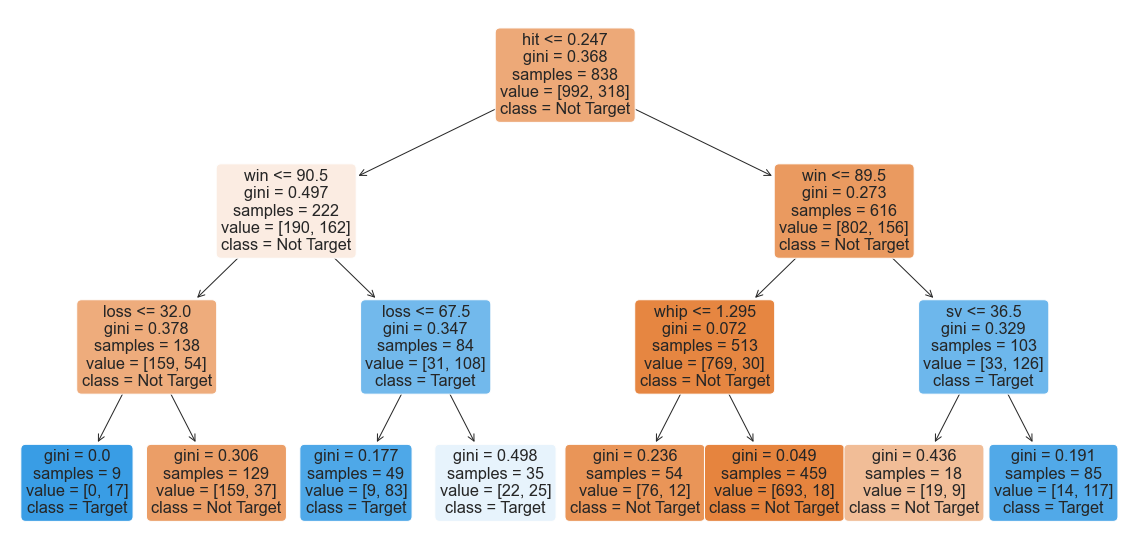

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming rf_classifier is your trained RandomForestClassifier
# Choose one tree from the forest (e.g., the first tree)
tree_to_visualize = rf_classifier.estimators_[0]

# Plot the selected tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_visualize, feature_names=X.columns, class_names=['Not Target', 'Target'], filled=True, rounded=True)
plt.show()